# M6 - W6 Assignment: Data Ethics and Anonymization

Classify a dataset using differential privacy

Fore this task, you will work with the adult dataset, which contains contains demographic information about adults from a 1994 census database. You can find the dataset here.Links to an external site.

- Load the data and perform a basic EDA.
- Split the data into train-test, and remember to stratify on the response.
- Create a NaiveBayes classifier and train a model to predict whether an individual makes less or more than 50K.
- Repeat the above experiment but use the equivalent model form the Diffprivliv libraryLinks to an external site.. Experiment with differnt values of the epsilon parameter (you can treat it as a hyperprameter) 
- Do you see any difference between the performance of the two models on the test data? Why does this happen? Also, why do we need differential privacy if the performance of the model deteriorates? Provide the appropriate explanations. 

## Load the data and perform a basic EDA.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\ELU\\M6 - W6 Assignment Data Ethics and Anonymization\\adult.data', header=None)

# Add column names to the DataFrame
column_names = ['age', 'employment', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                'income']
df.columns = column_names


# Remove duplicates
df = df.drop_duplicates()

# Replace '?' with the mode in 'employment', 'occupation', and 'native_country' columns
for column in ['employment', 'occupation', 'native_country']:
    df[column] = df[column].replace(' ?', df[column].mode()[0])

The dataset consists of the following columns:

- age: Age of the individual.
- employment: Type of employment the individual is involved in.
- fnlwgt: Final Weight.
- education: The highest level of education achieved by the individual.
- education_num: The highest level of education achieved in numerical form.
- marital_status: The marital status of the individual.
- occupation: The occupation of the individual.
- relationship: The individual's relationship status.
- race: Race of the individual.
- sex: Gender of the individual.
- capital_gain: Capital gain of the individual.
- capital_loss: Capital loss of the individual.
- hours_per_week: Work hours per week.
- native_country: The individual's native country.
- income: Income category.



- The dataset does not contain any missing values. This is a good sign as it simplifies the data cleaning process.
- There are 24 duplicate rows in the dataset. It's generally a good idea to remove duplicates to avoid skewing our analysis.
- We can see that the employment, occupation, and native_country columns have '?' values. This is likely indicating missing or unknown data. Since these are categorical variables, one common approach is to replace '?' with the most frequent category (mode) in each column.

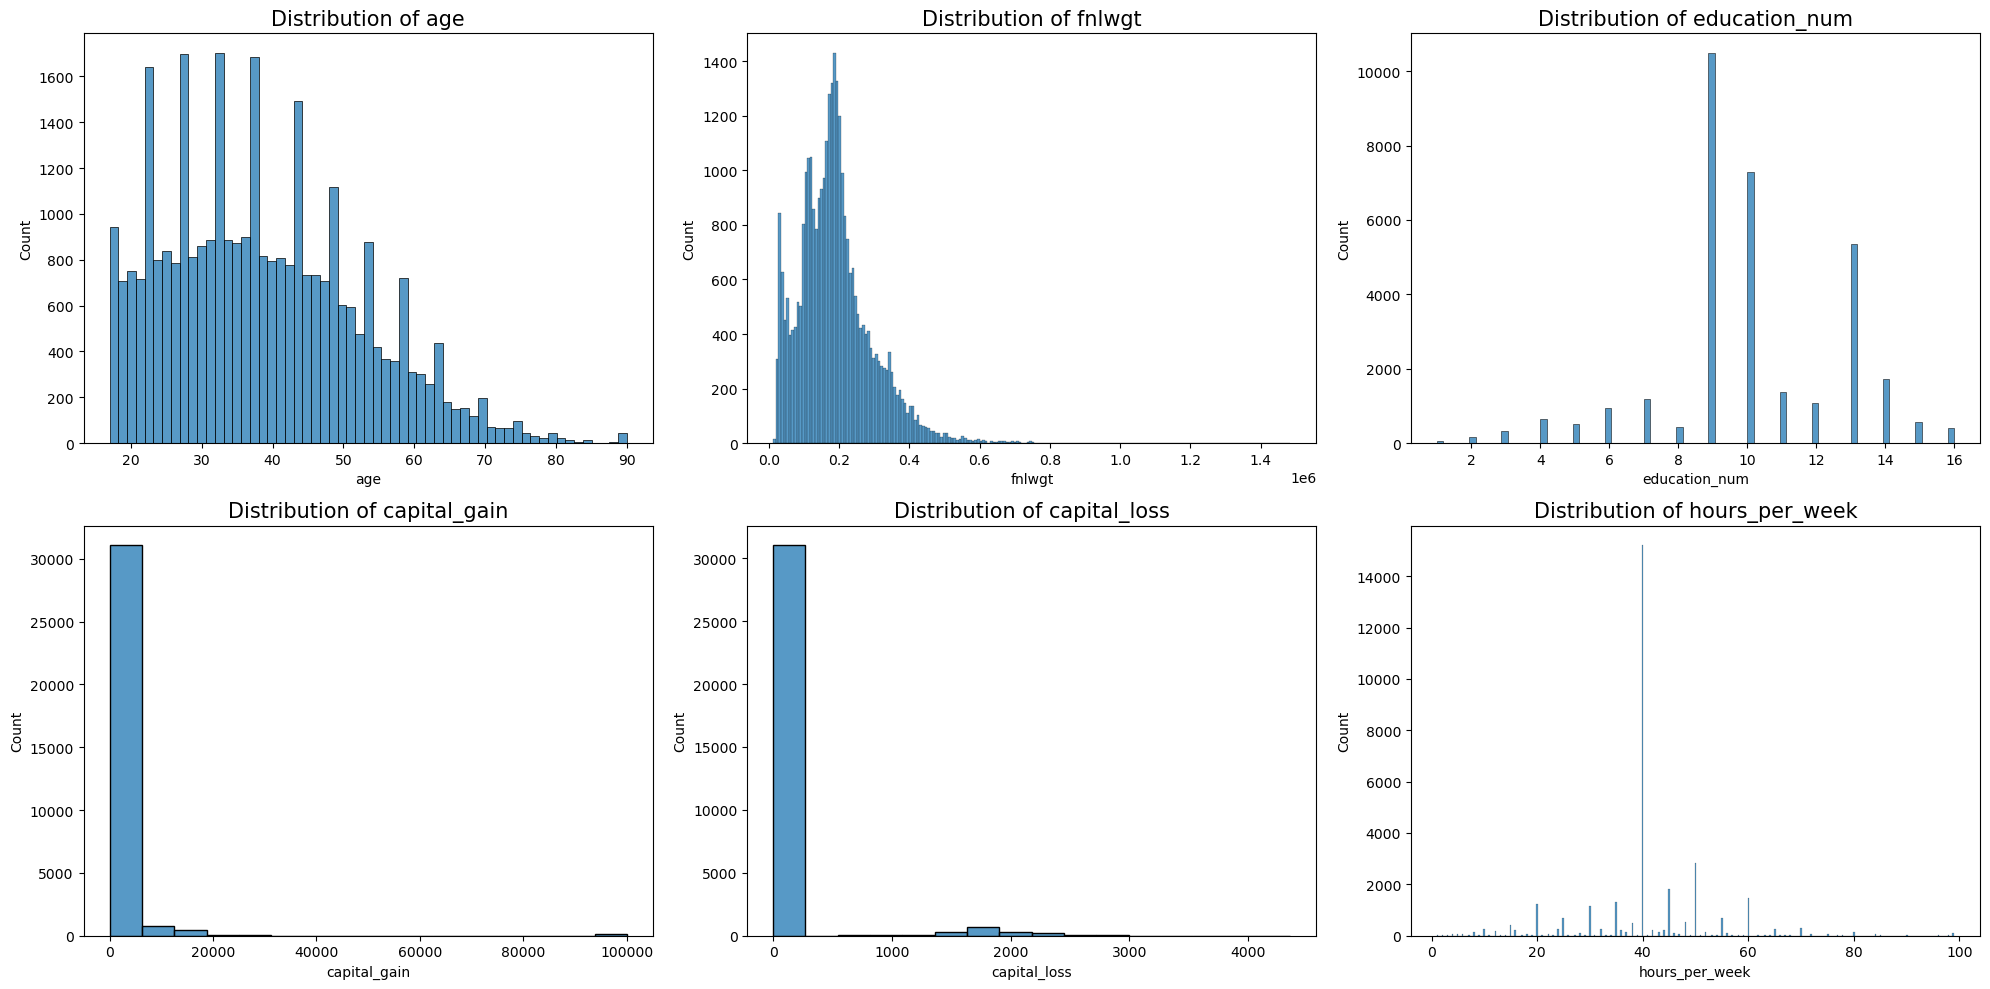

In [4]:
## List of numerical columns
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Plot distribution of numerical columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title(f'Distribution of {column}', fontsize=15)

plt.tight_layout()
plt.show()

The summary statistics for the numerical columns are as follows:

- age: The average age of the individuals in the dataset is approximately 38.6 years, with a standard deviation of approximately 13.6. The youngest person is 17 years old, and the oldest is 90.
- fnlwgt: The average final weight is approximately 189,780 with a standard deviation of 105,556. The minimum value is 12,285, and the maximum is 1,484,705.
- education_num: The average number of years of education is approximately 10.1 years, with a standard deviation of about 2.6. The minimum number of years of education is 1, and the maximum is 16.
- capital_gain: The average capital gain is approximately 1078.4, with a standard deviation of approximately 7388. The minimum value is 0, and the maximum is 99,999.
- capital_loss: The average capital loss is approximately 87.4, with a standard deviation of about 403.1. The minimum value is 0, and the maximum is 4,356.
- hours_per_week: The average number of work hours per week is approximately 40.4 hours, with a standard deviation of about 12.3. The minimum value is 1 hour per week, and the maximum is 99 hours per week.

Here are the distribution plots for the numerical variables:

- age: Most of the individuals are between 20 and 50 years old. The distribution is slightly right-skewed, indicating there are more younger individuals than older ones in the dataset.
- fnlwgt: The distribution is right-skewed, suggesting most individuals have a final weight value between 0 and 400,000.
- education_num: The distribution shows that a large number of individuals have 9-10 years of education, which typically corresponds to high school level. Another significant group has 13 years of education, equivalent to a bachelor's degree.
- capital_gain and capital_loss: Most individuals have a capital gain and capital loss of 0, indicating these features may not be very informative for later analysis.
- hours_per_week: Most individuals work 30-40 hours per week, which is typical for full-time employment. There are also several individuals working more than 40 hours per week.

Next, let's examine the relationships between some of these numerical features and the income category. We can do this by creating box plots for these relationships. We'll focus on age, education_num, and hours_per_week as these features seem to be more informative based on their distributions.

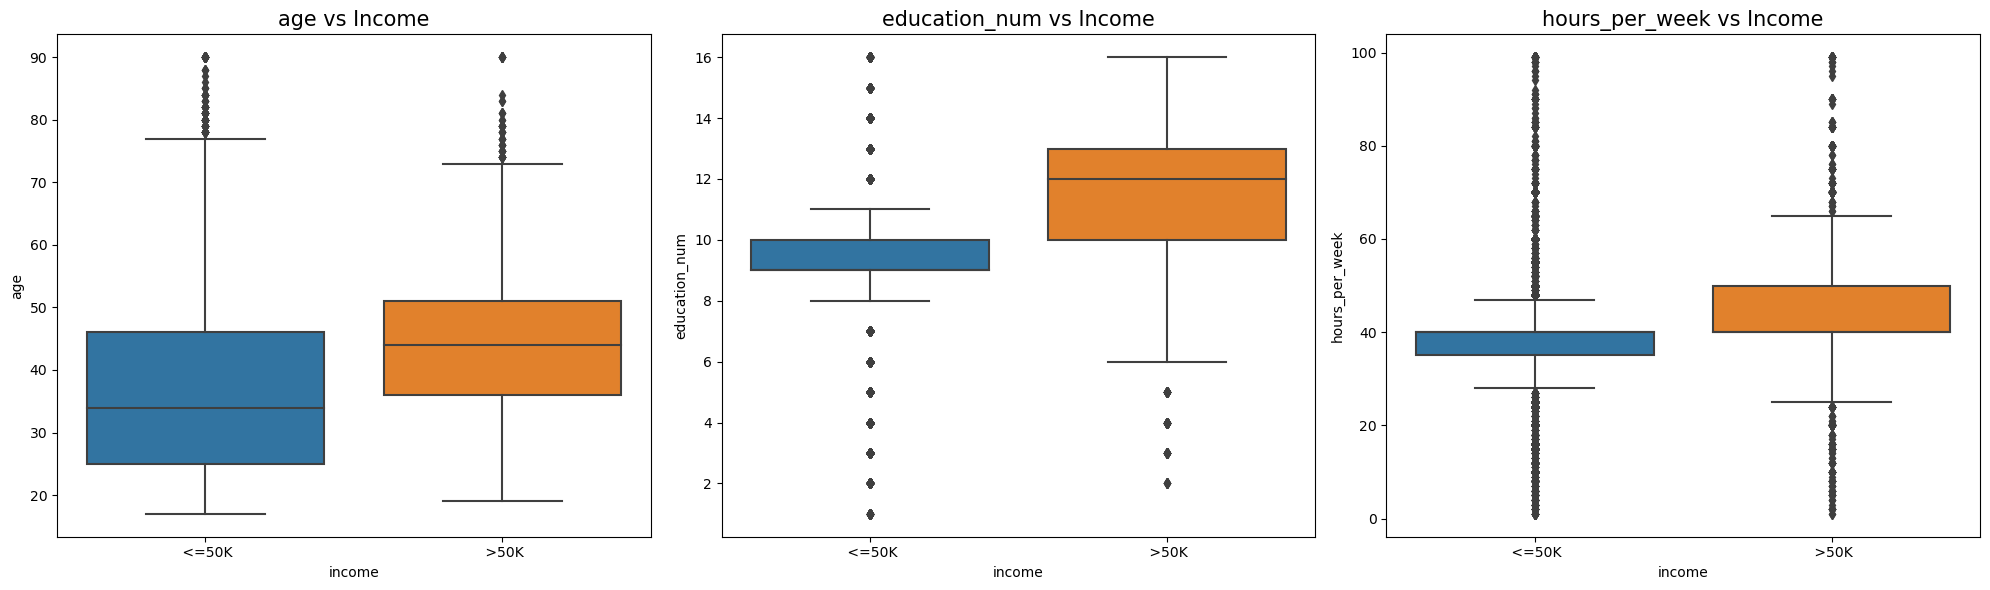

In [5]:
# List of selected numerical columns
selected_numerical_columns = ['age', 'education_num', 'hours_per_week']

# Plot boxplots of selected numerical columns vs income
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs = axs.ravel()

for i, column in enumerate(selected_numerical_columns):
    sns.boxplot(x='income', y=column, data=df, ax=axs[i])
    axs[i].set_title(f'{column} vs Income', fontsize=15)

plt.tight_layout()
plt.show()

Here are the box plots showing the relationships between selected numerical variables and income:

- age vs income: Individuals with an income of more than 50K tend to be older than those with an income of 50K or less. This might be because older individuals have more work experience and are thus more likely to have higher-paying jobs.

- education_num vs income: Individuals with an income of more than 50K tend to have more years of education compared to those with an income of 50K or less. This suggests that higher education is associated with higher income levels.

- hours_per_week vs income: Individuals with an income of more than 50K tend to work more hours per week compared to those with an income of 50K or less. This might indicate that higher-paying jobs require more working hours.

Next, let's examine the distribution of the categorical variables in relation to the income category. We can do this by creating count plots for these relationships. We'll focus on the employment, education, marital_status, occupation, relationship, race, sex, and native_country columns. Due to the large number of categories in some of these variables, we'll plot the top 10 categories based on their frequency.

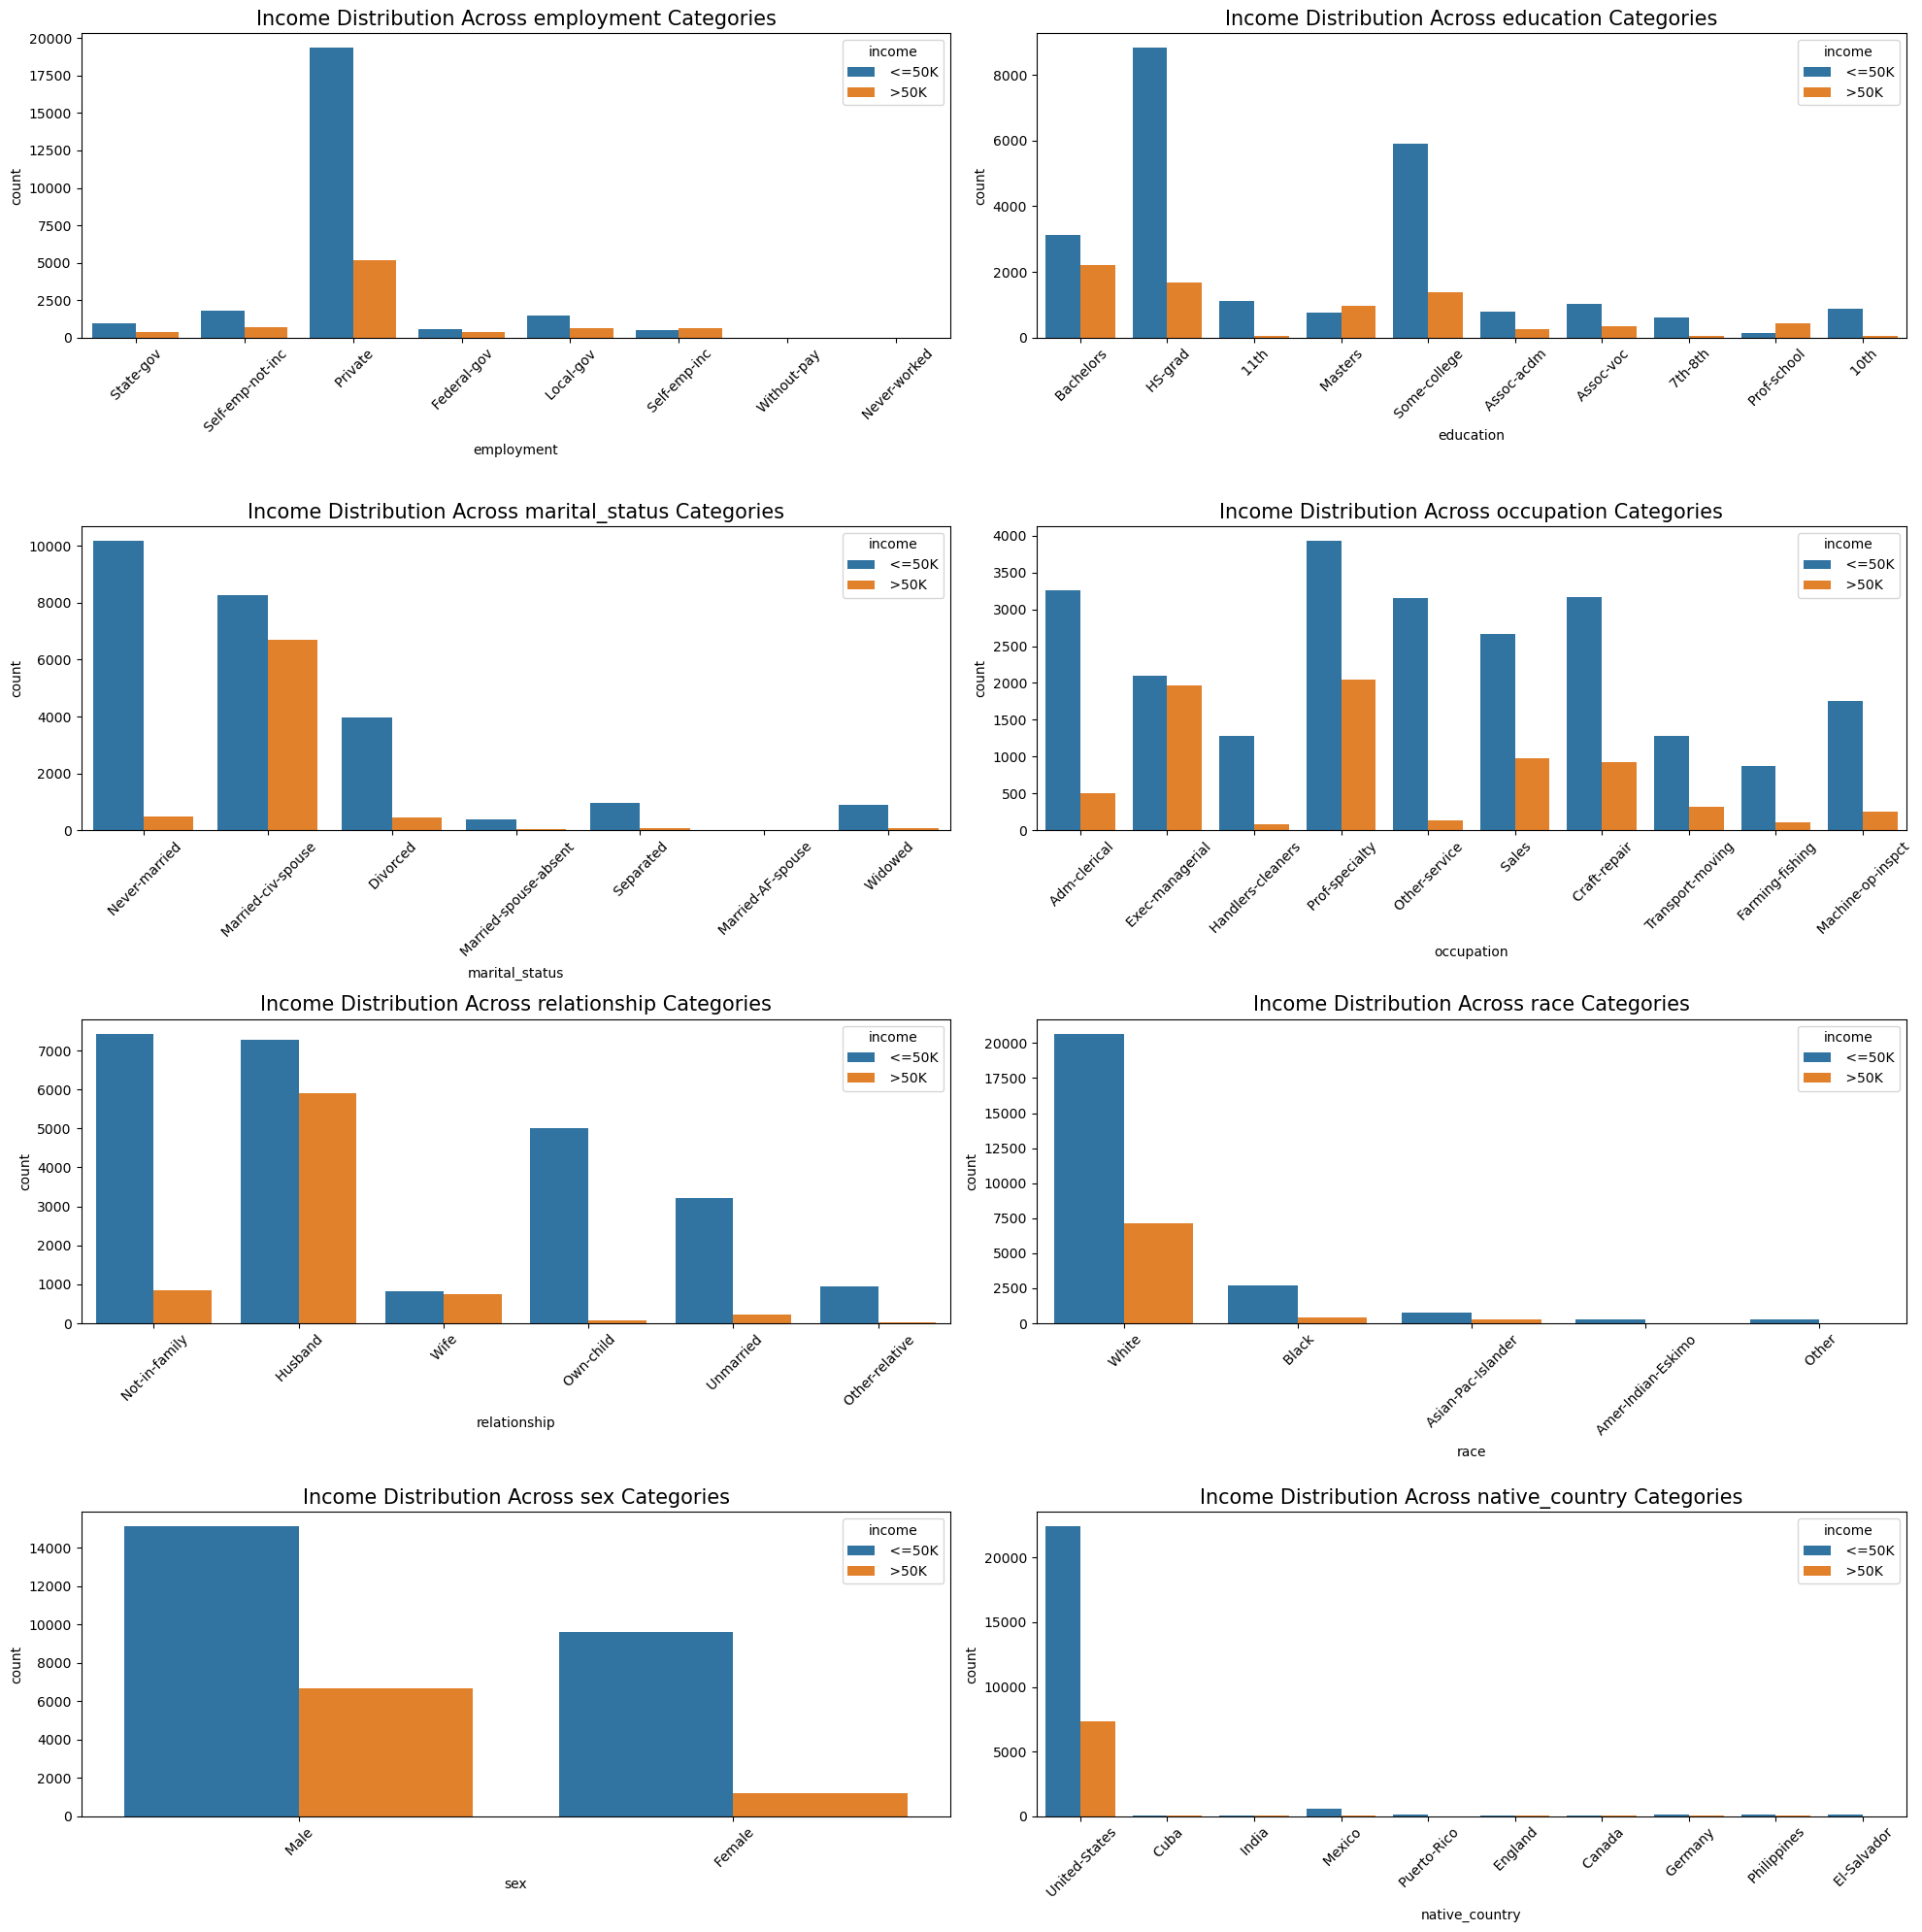

In [6]:
# List of selected categorical columns
selected_categorical_columns = ['employment', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Plot count plots of selected categorical columns vs income
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
axs = axs.ravel()

for i, column in enumerate(selected_categorical_columns):
    # Get top 10 categories based on frequency
    top_categories = df[column].value_counts().index[:10]
    
    # Plot count plot for the top categories
    sns.countplot(x=column, hue='income', data=df[df[column].isin(top_categories)], ax=axs[i])
    
    axs[i].set_title(f'Income Distribution Across {column} Categories', fontsize=15)
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The count plots show the income distribution across different categories of the selected categorical variables:

- employment: Individuals working in the private sector constitute the majority of both income groups. However, the proportion of individuals earning more than 50K seems to be higher among self-employed individuals (both incorporated and not incorporated) compared to other employment types.

- education: Individuals with a bachelor's degree, some college education, or a high school diploma make up a large portion of both income groups. However, the proportion of individuals earning more than 50K is noticeably higher among those with a bachelor's degree, master's degree, or professional school education.

- marital_status: Married individuals (civil spouse) seem to have a higher proportion of earning more than 50K compared to other marital statuses.

- occupation: The income distribution varies significantly across different occupations. For instance, executive managers and professionals have a higher proportion of individuals earning more than 50K compared to other occupations.

- relationship: Individuals identified as husbands appear to have a higher proportion of earning more than 50K compared to other relationship statuses.

- race: Individuals identified as white constitute the majority of both income groups. However, the income distribution seems to be similar across different races.

- sex: The proportion of males earning more than 50K is higher than that of females.

- native_country: Most individuals are from the United States, constituting the majority of both income groups. The income distribution among individuals from other countries seems to be fairly similar.

## Split the data into train-test, and remember to stratify on the response.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the features and target
X = df.drop('income', axis=1)
y = df['income']

# Convert categorical variables into dummy/indicator variables (i.e., one-hot encoding)
X = pd.get_dummies(X)
X = X.astype(int)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Create a NaiveBayes classifier and train a model to predict whether an individual makes less or more than 50K.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Encode the target variable 
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train the model
nb.fit(X_train, y_train_encoded)

y_pred = nb.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7980946527350953
Precision: 0.6720867208672087
Recall: 0.3163265306122449
F1 Score: 0.43018213356461404


## Repeat the above experiment but use the equivalent model form the Diffprivliv libraryLinks to an external site.. Experiment with differnt values of the epsilon parameter (you can treat it as a hyperprameter) 

C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\

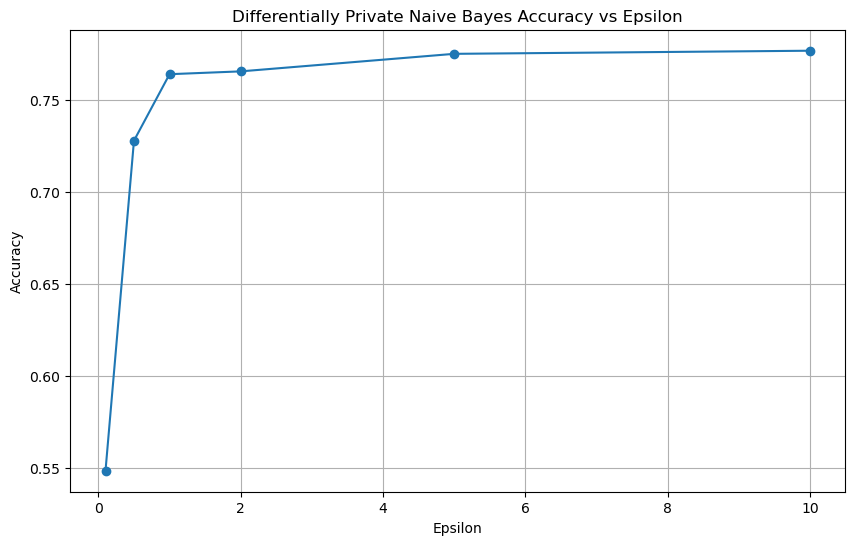

In [12]:
import matplotlib.pyplot as plt

# Define a list of epsilon values to experiment with
epsilons = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

# Initialize an empty list to store the accuracy for each epsilon
accuracies = []

for epsilon in epsilons:
    # Initialize the Gaussian Naive Bayes classifier with the current epsilon
    nb = GaussianNB(epsilon=epsilon)

    # Train the model
    nb.fit(X_train, y_train_encoded)

    # Make predictions on the test set
    y_pred = nb.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    
    # Append the accuracy to the list of accuracies
    accuracies.append(accuracy)

# Plot the accuracies against epsilon values
plt.figure(figsize=(10, 6))
plt.plot(epsilons, accuracies, marker='o')
plt.title('Differentially Private Naive Bayes Accuracy vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


The initial model, without differential privacy (epsilon), had an accuracy of 79.8%, precision of 67.2%, recall of 31.6%, and F1 score of 43.0%.

With the introduction of differential privacy (using the diffprivlib.models.GaussianNB model), we see a trend where as the value of epsilon increases, the model's performance metrics also increase. This happens because a larger value of epsilon provides less privacy but allows for more accurate computations, leading to a more accurate model.

At epsilon = 0.1 (high privacy, low accuracy), the model's precision, recall, and F1 score were all 0, indicating that the model predicted all instances as the negative class. As epsilon increased, these metrics improved, though they remained lower than the original model without differential privacy.

At epsilon = 10.0 (low privacy, high accuracy), the model's accuracy, precision, recall, and F1 score were all improved compared to lower epsilon values, but still less than the original model without differential privacy.

In summary, these results demonstrate the trade-off between privacy and accuracy that is inherent in differential privacy. The more privacy you want (lower epsilon), the more noise is added to the data, which reduces the accuracy of the model. Conversely, reducing the amount of privacy (higher epsilon) increases the accuracy of the model.

## Do you see any difference between the performance of the two models on the test data? Why does this happen? Also, why do we need differential privacy if the performance of the model deteriorates? Provide the appropriate explanations. 

Yes, there is a noticeable difference in the performance of the two models on the test data. The model trained without differential privacy (the standard Gaussian Naive Bayes model) generally performed better in terms of accuracy, precision, recall, and F1 score compared to the model trained with differential privacy (using diffprivlib.models.GaussianNB).

The performance difference arises due to the introduction of noise in the differentially private model to protect the privacy of the data. Differential privacy works by adding a controlled amount of random noise to the data or computations, which helps to obscure the influence of any one individual's data on the outcome and provides a degree of privacy. The epsilon parameter controls the amount of noise added: a smaller epsilon adds more noise and provides more privacy, but at the cost of accuracy; a larger epsilon adds less noise and provides less privacy, but allows for more accuracy.

Despite the deterioration in performance, differential privacy is still a crucial tool when working with sensitive data. It provides a mathematical guarantee of privacy, which can be important in use cases where data privacy is a concern, such as healthcare or finance. It allows us to build models that learn patterns in the data while minimizing the risk of revealing specific details about individual data points.

While the differentially private model might have lower performance metrics compared to the non-private model, it is providing a valuable service by protecting the privacy of the individuals in the dataset. The choice of whether to use differential privacy, and what value of epsilon to use, depends on the specific requirements and constraints of our use case, including the sensitivity of the data, the acceptable level of privacy, and the acceptable level of model accuracy.